In [13]:
import pandas as pd
from matplotlib import pyplot as plt

import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import eli5
from eli5.sklearn import PermutationImportance

Using TensorFlow backend.


In [2]:
df = pd.read_csv("KS_train_final.csv")

In [3]:
df.head(5)

,staff_pick,funded,is_cat_art,is_cat_music,is_cat_film,is_cat_technology,is_cat_publishing,is_cat_food,is_cat_games,is_cat_fashion,...,is_2016,is_2017,is_2018,sentiment_pos,sentiment_neu,sentiment_neg,blurb_bayes,log_goal_usd,log_days_to_launch,log_days_to_dealine
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.770405,0.536852,0.571877,0.636119
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.913929,0.557160,0.417726,0.786681
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.660800,0.561670,0.269857,0.890160
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.993950,0.572900,0.285142,0.624541
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.623790,0.608693,0.515240,0.713862


In [4]:
X = df.drop(['funded'], axis=1)
y = df['funded']
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.005)

In [5]:
# hyper parameter grid
hidden_layer_sizes = [(40, 40, 40, 40), (30, 20, 10), (50, 50), (30, 15)]
activation = ['logistic', 'tanh', 'relu']
solver = ['sgd', 'adam']
batch_size = [16, 32, 64, 128, 256]
learning_rate_init = [0.001, 0.01, 0.1, 0.2, 0.5]
max_iter = [400]


In [6]:
params = dict(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver, batch_size=batch_size, 
             learning_rate_init=learning_rate_init, max_iter=max_iter)
grid = GridSearchCV(estimator=MLPClassifier(), param_grid=params, n_jobs=1, cv=3)

In [7]:
grid_result = grid.fit(X_validate, y_validate);

c:\users\ajay mota\pycharmprojects\bit\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\ajay mota\pycharmprojects\bit\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\ajay mota\pycharmprojects\bit\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\ajay mota\pycharmprojects\bit\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) re

c:\users\ajay mota\pycharmprojects\bit\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\ajay mota\pycharmprojects\bit\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\ajay mota\pycharmprojects\bit\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\ajay mota\pycharmprojects\bit\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) re

c:\users\ajay mota\pycharmprojects\bit\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\ajay mota\pycharmprojects\bit\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\ajay mota\pycharmprojects\bit\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\ajay mota\pycharmprojects\bit\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) re

c:\users\ajay mota\pycharmprojects\bit\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\ajay mota\pycharmprojects\bit\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\ajay mota\pycharmprojects\bit\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\ajay mota\pycharmprojects\bit\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) re

c:\users\ajay mota\pycharmprojects\bit\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\ajay mota\pycharmprojects\bit\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\ajay mota\pycharmprojects\bit\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\ajay mota\pycharmprojects\bit\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) re

c:\users\ajay mota\pycharmprojects\bit\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\ajay mota\pycharmprojects\bit\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\ajay mota\pycharmprojects\bit\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\ajay mota\pycharmprojects\bit\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) re

c:\users\ajay mota\pycharmprojects\bit\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\ajay mota\pycharmprojects\bit\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\ajay mota\pycharmprojects\bit\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\ajay mota\pycharmprojects\bit\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) re

c:\users\ajay mota\pycharmprojects\bit\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\ajay mota\pycharmprojects\bit\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\ajay mota\pycharmprojects\bit\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\ajay mota\pycharmprojects\bit\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) re

c:\users\ajay mota\pycharmprojects\bit\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\ajay mota\pycharmprojects\bit\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\ajay mota\pycharmprojects\bit\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\ajay mota\pycharmprojects\bit\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) re

In [8]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.818372 using {'activation': 'tanh', 'batch_size': 32, 'hidden_layer_sizes': (40, 40, 40, 40), 'learning_rate_init': 0.001, 'max_iter': 400, 'solver': 'sgd'}


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
classifier = MLPClassifier(activation='tanh', batch_size=32, hidden_layer_sizes=(40, 40, 40, 40), learning_rate_init=0.001, max_iter= 2000, solver='sgd')

In [7]:
classifier.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size=32, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(40, 40, 40, 40), learning_rate='constant',
              learning_rate_init=0.001, max_iter=2000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

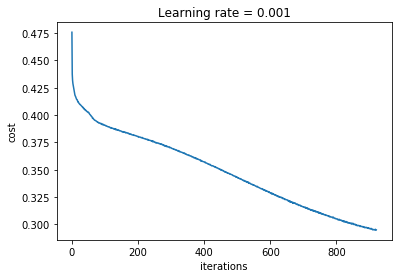

In [8]:
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate = " + str(0.001))
plt.plot(classifier.loss_curve_)
plt.show()

In [9]:
classifier.score(X_train, y_train)

0.8736423841059603

In [10]:
classifier.score(X_test, y_test)

0.7819649504370739

In [11]:
classifier.score(X, y)

0.8507225463747203

In [14]:
perm = PermutationImportance(classifier, random_state=1).fit(X_test, y_test)

In [16]:
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=40)

Weight,Feature
0.1538 ± 0.0030,blurb_bayes
0.0411 ± 0.0008,log_goal_usd
0.0273 ± 0.0019,staff_pick
0.0166 ± 0.0012,is_2014
0.0161 ± 0.0023,is_2015
0.0142 ± 0.0029,log_days_to_launch
0.0120 ± 0.0026,is_2013
0.0119 ± 0.0028,is_2012
0.0106 ± 0.0012,is_cat_other
0.0096 ± 0.0008,is_2011


In [17]:
same = ['blurb_bayes', 'staff_pick', 'goal', '2014', '2013', '2012', '2015', 'days_to_launch']

SyntaxError: invalid syntax (<ipython-input-17-0cc844ae3705>, line 1)

In [ ]:
different = ['art', 'tech', 'food', '2010', '2016']

In [18]:
X = X.drop(['blurb_bayes'], axis=1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [20]:
classifier = MLPClassifier(activation='tanh', batch_size=32, hidden_layer_sizes=(40, 40, 40, 40), learning_rate_init=0.001, max_iter= 2000, solver='sgd')

In [21]:
classifier.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size=32, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(40, 40, 40, 40), learning_rate='constant',
              learning_rate_init=0.001, max_iter=2000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

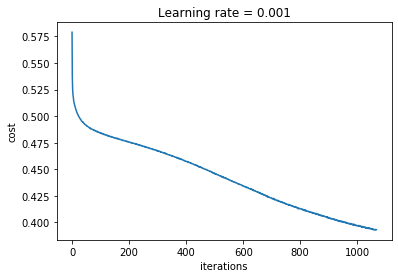

In [22]:
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate = " + str(0.001))
plt.plot(classifier.loss_curve_)
plt.show()

In [23]:
classifier.score(X_train, y_train)

0.8150435691878704

In [24]:
classifier.score(X_test, y_test)

0.7178468359195282

In [25]:
classifier.score(X, y)

0.7907438777003994

In [26]:
perm = PermutationImportance(classifier, random_state=1).fit(X_test, y_test)

In [27]:
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=40)

Weight,Feature
0.0514 ± 0.0065,log_goal_usd
0.0406 ± 0.0019,staff_pick
0.0341 ± 0.0024,sentiment_pos
0.0280 ± 0.0027,is_2014
0.0272 ± 0.0047,sentiment_neu
0.0257 ± 0.0031,is_2015
0.0241 ± 0.0046,log_days_to_launch
0.0197 ± 0.0014,sentiment_neg
0.0180 ± 0.0013,is_2013
0.0176 ± 0.0021,is_2011
